## Telecom Subscribers data analysis


## Exploratary Data Analysis (EDA)

In [3]:
import pandas as pd
import numpy as np
import matplotlib,matplotlib.pyplot as plt
import mplcyberpunk
from datetime import datetime

# Our dataset
df=pd.read_csv("data.csv")

def Vendors():
    global vendors
    vendors=df["Service Providers"]
    vendors=set(vendors)
    vendors=list(vendors)
    return vendors
    #print(vendors)

Vendors()

def FilterDates():
    global new_df
    new_df=df.sort_values(by="Fiscal Year AD" ,ascending=True)
 
     
FilterDates()
new_df=new_df.reset_index()
new_df.drop(columns=["index"]) 

unique_dates_AD=set((new_df["Fiscal Year AD"]))
unique_dates_BS=set((new_df["Fiscal Year BS"]))

# creating a new data frame 'bsad_df' just to sort dates for BS and AD 
# when you sort AD column the BS columns get rearranged so have to create a new data frame for both dates so that we dont
# have to use .sort_values(by="") which disturbs our work

def  SortBSAD_dates():
    global bs_df
    global ad_df
    bs_df=pd.DataFrame(columns=["Year BS"])
    bs_df["Year BS"]=list(unique_dates_BS)
    bs_df=bs_df.sort_values(by="Year BS")
    bs_df=bs_df.reset_index()
    bs_df=bs_df.drop(columns=["index"])
    
    # For AD
    
    ad_df=pd.DataFrame(columns=["Year AD"])
    ad_df["Year AD"]=list(unique_dates_AD)
    ad_df=ad_df.sort_values(by="Year AD")
    ad_df=ad_df.reset_index()
    ad_df=ad_df.drop(columns=["index"])

SortBSAD_dates()

def addBSandAD():
    global test_df
    # Creating a data frame <test_df> for our main work 
    test_df=pd.DataFrame(columns=["Year AD","Year BS"]+vendors)

    test_df["Year AD"]=ad_df["Year AD"]
    test_df["Year BS"]=bs_df["Year BS"]
    #test_df=test_df.sort_values(by="Year AD",ascending=True)

    test_df=test_df.reset_index()
    test_df=test_df.drop(columns=["index"])
    test_df

addBSandAD()
class PutValues: # to put subs data into respective vendors or columns
    def NTC(self):
        global test_df
        ntc=new_df.loc[new_df["Service Providers"]=="Nepal Telecom Limited"]
        test_df["Nepal Telecom Limited"]=ntc.Subscribers

apply=PutValues()
apply.NTC()


def putVals():
    # putting values into all vendors columns    
    vendors=Vendors()
    for vendor in vendors:
        test_df[f"{vendor}"]=new_df.loc[new_df["Service Providers"]==f"{vendor}"]["Subscribers"].to_list()
    
    # theres a wrong value in Nepal Satellite Telecom Pvt. which is -10 lets fix that
    test_df.iloc[4,5]=10
 
        
putVals() 

## Data visualization

### Line graph

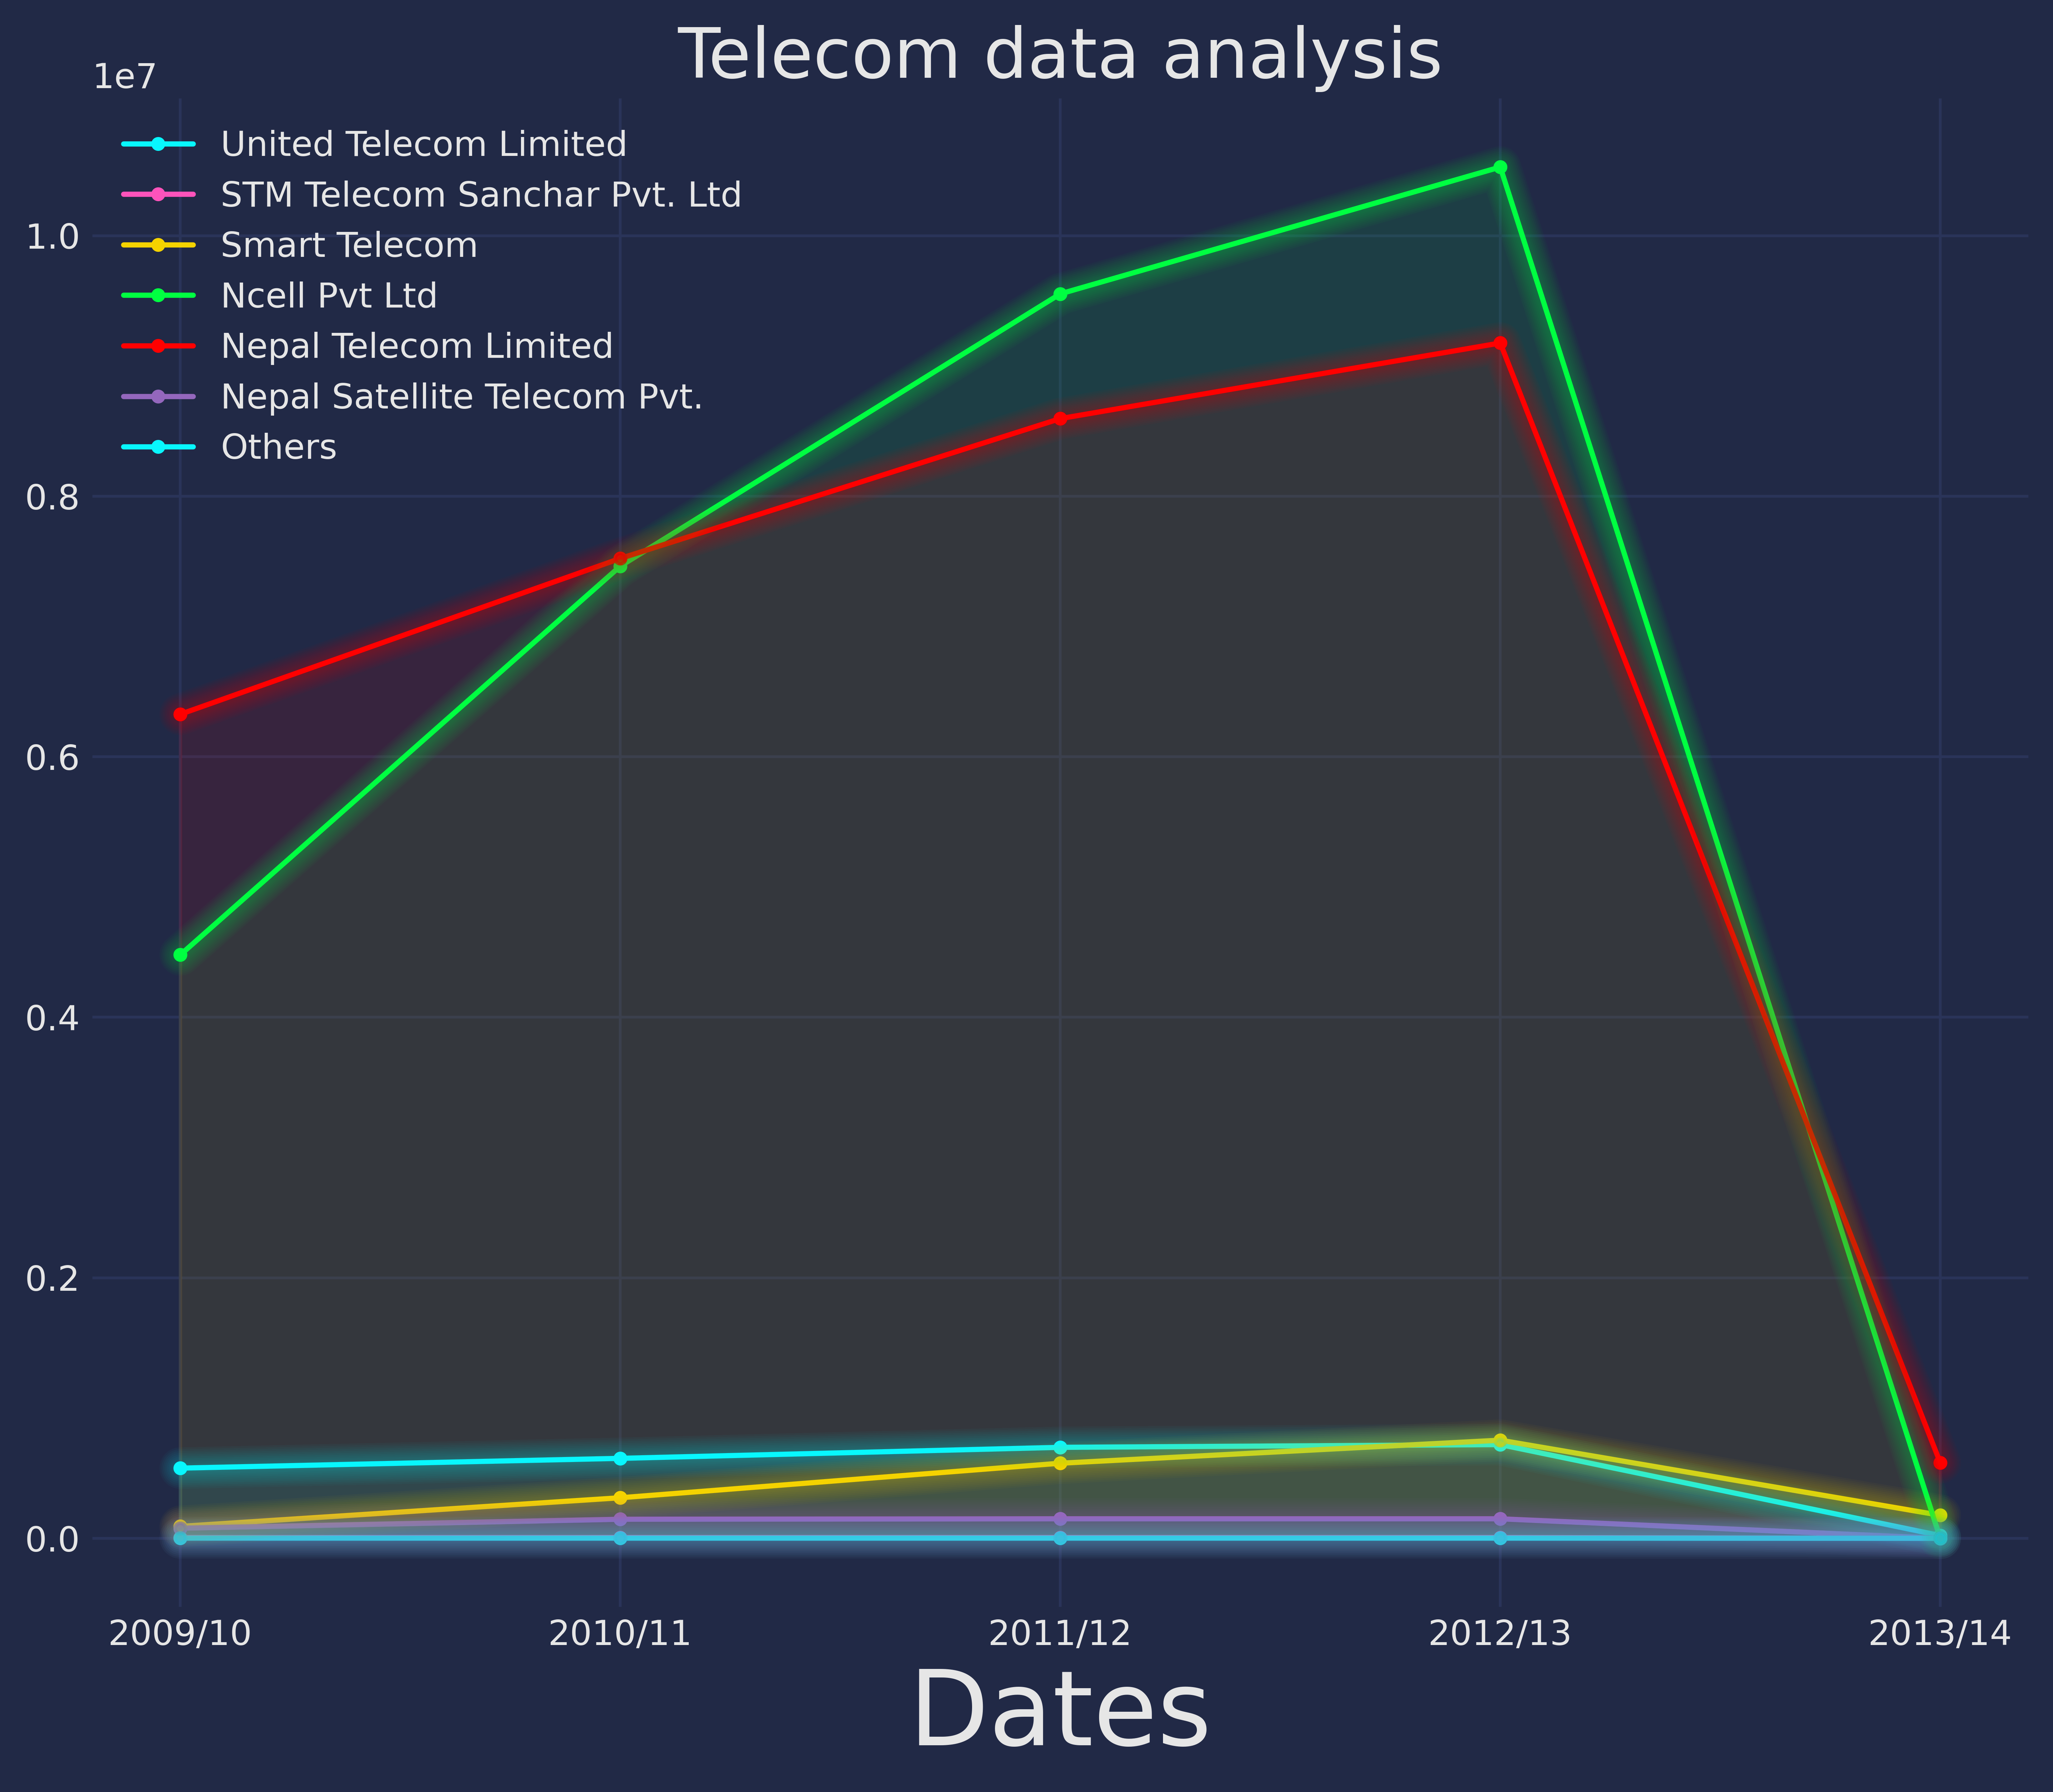

In [4]:
from collections import OrderedDict


# We not use BS year do lets drop that
test_df=test_df.drop(columns=['Year BS'])


plt.style.use("cyberpunk")
plt.figure(figsize=(10,8),dpi=700)
plt.title("Telecom data analysis",fontdict={'fontsize':'20'})
plt.xlabel("Dates",fontdict={'fontsize':'30'})
for  items in test_df:
    if items!='Year AD':
        plt.plot(test_df["Year AD"],test_df[items],marker=".",label=items)
plt.xticks(test_df["Year AD"][::1])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
mplcyberpunk.add_glow_effects()
plt.legend(by_label.values(), by_label.keys())
plt.show()  

